In [1]:
from py_xavier import Xavier

xavier = Xavier('localhost', 8000)
xavier.api_isalive()

True

In [32]:
from typing import List 
from py_xavier.custom_types import PulseTrain
import time

pulse_train_collection: List[PulseTrain] = []

reset_voltages = np.array([-1, -1, -1])*0.5
set_voltages = np.array([1, 1, 1])*0.5

reset_pulse_width = 1e-3
set_pulse_width = 10e-3

down_time = 1e-3

for i in range(2):
    for train_type in ['potenciation', 'depression']:
        if train_type == 'depression':
            v_low = 0
            v_high = reset_voltages[i]
            cycle_time = reset_pulse_width + down_time
            duty_cycle = reset_pulse_width / cycle_time
        else:
            v_low = 0
            v_high = set_voltages[i] 
            cycle_time = set_pulse_width + down_time
            duty_cycle = set_pulse_width / cycle_time

        pulse_train_collection.append({
            'cycle_time': cycle_time,
            'duty_cycle': duty_cycle,
            'n_pulses': 100,
            'v_high': v_high,
            'v_low': v_low
        })


args = {
    "pulse_train_collection": pulse_train_collection,
    "n_points_high": 100,
    "n_points_low": 100,
    "avg_time": 100e-6,
    "noise": False,
    "noise_std": 0.0
}

meas_id = -1

meas_resp = xavier.measure.pulse_collection(**args)
if 'id' in meas_resp:
    meas_id = meas_resp['id']
    
    
time.sleep(8)
    

b'{"id":3352}'


{'id': 3352}

<Figure size 1000x500 with 0 Axes>

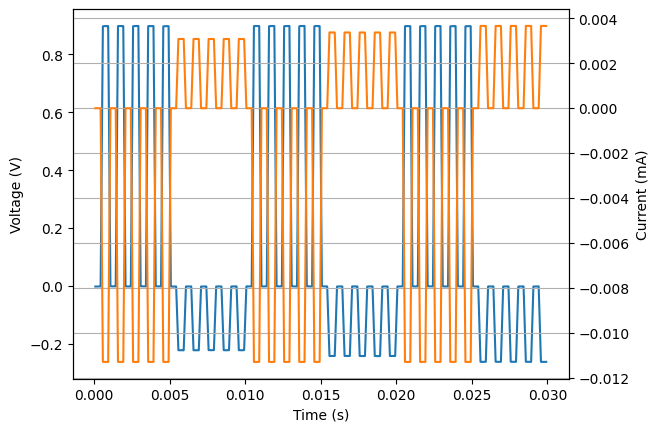

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = xavier.measure.retrieve_measurement(3352)['data']

voltage = list(map(lambda el: el['voltage'], data))
time = list(map(lambda el: el['time'], data))
current = np.array(list(map(lambda el: el['current'], data)))

plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
ax2 = ax.twinx()

voltage_plot = ax.plot(time, voltage, label='Voltage')
current_plot = ax2.plot(time, current, color='C1', label='Current')

ax.set_ylabel('Voltage (V)')
ax2.set_ylabel(r'Current (mA)')
ax.set_xlabel('Time (s)')

plt.grid()
plt.show()